In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,RobustScaler,StandardScaler,PowerTransformer
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold,cross_val_score,cross_val_predict
from sklearn.model_selection import train_test_split,cross_validate

In [2]:
df = pd.read_csv("./dataset/train.csv",parse_dates=['instock_date'])

In [3]:
df.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
2,BRAEAR7WZPQGPBZU,9.0,2015-08-18 19:25:22,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
3,WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28 21:53:01,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
4,JWSEBUKYQPMBZ3RK,7.0,2016-03-29 22:58:53,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935


In [4]:
df['Selling_Price'] = df['Selling_Price'].abs()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6368 entries, 0 to 6367
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_id        6368 non-null   object        
 1   Stall_no          6363 non-null   float64       
 2   instock_date      6368 non-null   datetime64[ns]
 3   Market_Category   6368 non-null   int64         
 4   Customer_name     6157 non-null   object        
 5   Loyalty_customer  6368 non-null   object        
 6   Product_Category  6368 non-null   object        
 7   Grade             6368 non-null   int64         
 8   Demand            6368 non-null   int64         
 9   Discount_avail    6330 non-null   float64       
 10  charges_1         6170 non-null   float64       
 11  charges_2 (%)     6163 non-null   float64       
 12  Minimum_price     6330 non-null   float64       
 13  Maximum_price     6025 non-null   float64       
 14  Selling_Price     6327 n

In [6]:
df.describe()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
count,6363.000000,6368.000000,6368.000000,6368.000000,6330.000000,6170.000000,6163.000000,6330.000000,6025.000000,6327.000000
mean,25.309445,199.340609,0.643687,50.921168,0.140442,264.514100,10.146195,3531.349763,6432.545892,4580.406478
std,14.328980,170.275570,1.025092,29.091922,0.347473,124.483056,4.318339,2194.729604,3716.177364,2952.640478
min,1.000000,0.000000,0.000000,1.000000,0.000000,100.000000,1.000000,1.000000,404.000000,4.000000
25%,13.000000,55.000000,0.000000,26.000000,0.000000,163.000000,7.000000,1879.250000,3918.000000,2461.805312
50%,25.000000,132.000000,0.000000,51.000000,0.000000,252.000000,10.000000,3157.500000,5634.000000,4215.972992
75%,37.000000,403.000000,2.000000,76.000000,0.000000,314.000000,14.000000,4697.000000,8126.000000,6167.643252
max,50.000000,471.000000,3.000000,100.000000,1.000000,649.000000,17.000000,17580.000000,58812.000000,22638.325941


In [7]:
#Capping the outlier rows with Percentiles
upper_lim = df['Minimum_price'].quantile(.95)
lower_lim = df['Minimum_price'].quantile(.05)
df.loc[(df['Minimum_price'] > upper_lim),"Minimum_price"] = upper_lim
df.loc[(df['Minimum_price'] < lower_lim),"Minimum_price"] = lower_lim

In [8]:
df.isna().sum()

Product_id            0
Stall_no              5
instock_date          0
Market_Category       0
Customer_name       211
Loyalty_customer      0
Product_Category      0
Grade                 0
Demand                0
Discount_avail       38
charges_1           198
charges_2 (%)       205
Minimum_price        38
Maximum_price       343
Selling_Price        41
dtype: int64

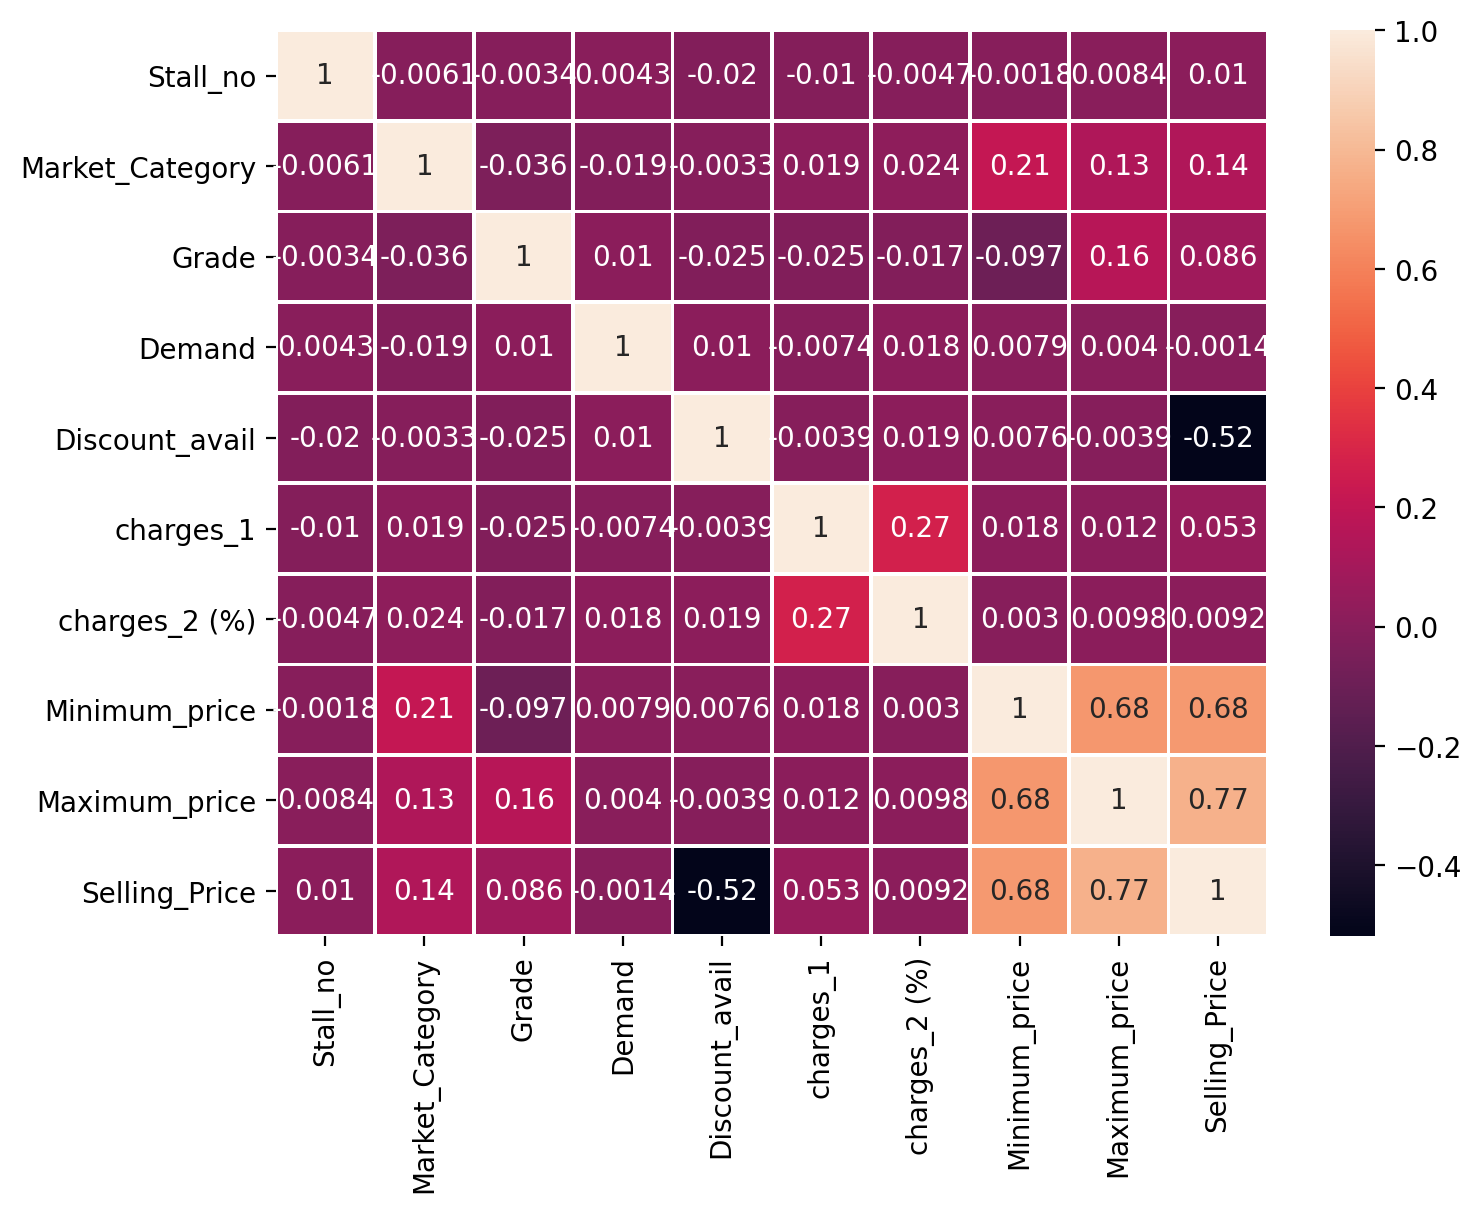

In [9]:
plt.figure(figsize=(8,6),dpi=200)
sns.heatmap(df.corr(),linewidth=1,annot=True)
plt.show()

<Figure size 864x720 with 0 Axes>

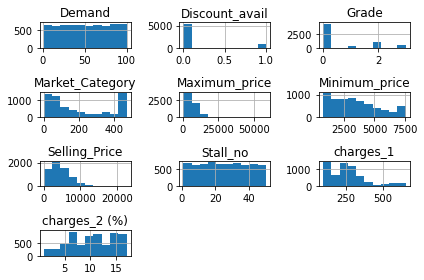

In [10]:
plt.figure(figsize=(12,10))
df.hist()
plt.tight_layout()

In [11]:
# df['QuarterOfYear'] = df['instock_date'].dt.quarter
# df['DayOfMonth'] = df['instock_date'].dt.day
# df['DayOfWeek'] = df['instock_date'].dt.dayofweek

In [12]:
df.corr()

,Stall_no,Market_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Stall_no,1.000000,-0.006145,-0.003449,0.004302,-0.019656,-0.010224,-0.004745,-0.001807,0.008443,0.010454
Market_Category,-0.006145,1.000000,-0.036346,-0.018800,-0.003306,0.019009,0.024154,0.214893,0.134257,0.140552
Grade,-0.003449,-0.036346,1.000000,0.010107,-0.025232,-0.025316,-0.016644,-0.096855,0.164350,0.085598
Demand,0.004302,-0.018800,0.010107,1.000000,0.010230,-0.007370,0.017653,0.007937,0.003987,-0.001432
Discount_avail,-0.019656,-0.003306,-0.025232,0.010230,1.000000,-0.003899,0.018905,0.007633,-0.003918,-0.519173
charges_1,-0.010224,0.019009,-0.025316,-0.007370,-0.003899,1.000000,0.270625,0.017862,0.012169,0.053465
charges_2 (%),-0.004745,0.024154,-0.016644,0.017653,0.018905,0.270625,1.000000,0.003021,0.009816,0.009202
Minimum_price,-0.001807,0.214893,-0.096855,0.007937,0.007633,0.017862,0.003021,1.000000,0.675085,0.683336
Maximum_price,0.008443,0.134257,0.164350,0.003987,-0.003918,0.012169,0.009816,0.675085,1.000000,0.773181
Selling_Price,0.010454,0.140552,0.085598,-0.001432,-0.519173,0.053465,0.009202,0.683336,0.773181,1.000000


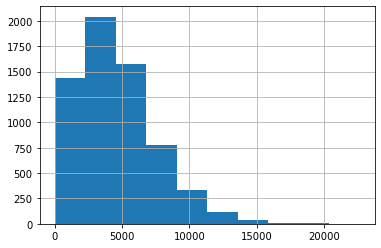

In [13]:
df['Selling_Price'].hist()

In [14]:
print(df.columns)

Index(['Product_id', 'Stall_no', 'instock_date', 'Market_Category',
       'Customer_name', 'Loyalty_customer', 'Product_Category', 'Grade',
       'Demand', 'Discount_avail', 'charges_1', 'charges_2 (%)',
       'Minimum_price', 'Maximum_price', 'Selling_Price'],
      dtype='object')


-- Divide the data into features and labels
--PIPELINE--

-- Remove Extra Features
-- Fill the missing values
-- Create new features may_be
-- Label Encoding
-- Transform/Scale the features

-- Use cross validation with custom metric rmsle
-- Model evaluation

In [15]:
features = df.drop(['Selling_Price'],axis=1)
labels = df['Selling_Price']

In [16]:
cat_features = ['Loyalty_customer','Grade']
extra_features = ['Product_id','Customer_name','instock_date']
num_features = ['Stall_no','Market_Category','Demand','Discount_avail','charges_1','charges_2 (%)','Minimum_price','Maximum_price']

In [17]:
class FeatureSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attr_names=extra_features):
        self.attr_names = attr_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        return X.drop(self.attr_names,axis=1)

In [18]:
class OneHotEncoderTransformer(BaseEstimator,TransformerMixin):
    def __init__(self,attr_names=cat_features):
        self.attr_names = attr_names
        
    def fit(self,X,y=None):
        return self
    
    def transform(self,X): 
        X['Product_Category'] = LabelEncoder().fit_transform(X['Product_Category'])
        return pd.get_dummies(X, columns=self.attr_names, drop_first=True)
        

In [19]:
preprocessing_pipeline = Pipeline([
    ("feature selector",FeatureSelector()),
    ("oneHotEncoder",OneHotEncoderTransformer()),
    ("imputer",SimpleImputer(strategy="median")),
    ("standard scaler",StandardScaler()),
    ("power transformer",PowerTransformer()),
#     ("pca",PCA(n_components=18))
    
])

In [20]:
label_transformer = PowerTransformer()
label_imputer = SimpleImputer(strategy="median")
labels = labels.values.reshape([-1,1])

features_prepared = preprocessing_pipeline.fit_transform(features)
labels = label_imputer.fit_transform(labels)
labels_prepared = label_transformer.fit_transform(labels)

In [21]:
features_prepared.shape,labels_prepared.shape

((6368, 13), (6368, 1))

In [22]:
######################### - - - - - - - - - - #########################

In [25]:
def rmsle(real, predicted, custom=True):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
        
        if custom==True:
            return max(0,100 - (sum/len(predicted))**0.5) #custom metric
        return (sum/len(predicted))**0.5

rmsle_score = make_scorer(rmsle, greater_is_better=False)
rg = RandomForestRegressor()

cv = RepeatedKFold(n_splits=5,n_repeats=5)
rf_scores = cross_val_score(rg, features_prepared, labels_prepared, cv=cv,n_jobs=-1,scoring=rmsle_score)
print(np.mean(-rf_scores))

99.99959331260634


In [26]:
-rf_scores

array([99.99923375, 99.99900667, 99.99982016, 99.99986732, 99.99967418,
       99.99975372, 99.999722  , 99.99985141, 99.99973143, 99.99978722,
       99.9992716 , 99.99997432, 99.99984306, 99.9988391 , 99.99876724,
       99.99978175, 99.99935203, 99.99939958, 99.99987448, 99.999996  ,
       99.99914741, 99.99991982, 99.99969482, 99.99978536, 99.99973839])

In [27]:
###########################################################

In [28]:
labels_df = pd.DataFrame(labels)
labels_cat = pd.cut(labels_df.iloc[:,0],
                               bins=[0.,2500.,5000.,7500.,10000.,12500.,15000.,17500.,20000., np.inf],
                               labels=[1, 2, 3, 4, 5,6,7,8,9])

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.22, random_state=42)

for train_index,test_index in split.split(features_prepared, labels_cat):
    X_train = features_prepared[train_index]
    X_test = features_prepared[test_index]
    y_train = labels[train_index]
    y_test = labels[test_index]

normal_transformer = PowerTransformer()
y_train_normal = normal_transformer.fit_transform(y_train)
y_test_normal = normal_transformer.transform(y_test)    

In [29]:
y_test_normal.shape,y_train_normal.shape,X_train.shape,X_test.shape

((1401, 1), (4967, 1), (4967, 13), (1401, 13))

In [24]:
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [30]:
from sklearn.base import clone

minimum_val_error = float("inf")
best_epoch = None
best_model = None

model = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                        penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)


for epoch in range(1000):
    model.fit(X_train, y_train_normal.ravel())  # continues where it left off
    y_val_predict = model.predict(X_test)
    val_error = mean_squared_error(y_test_normal, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(model)

In [31]:
best_model,best_epoch

(SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True),
 60)

In [32]:
from sklearn.metrics import mean_squared_error

def plot_learning_curves(model):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train_normal[:m].ravel())
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_normal[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_test_normal, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=1, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

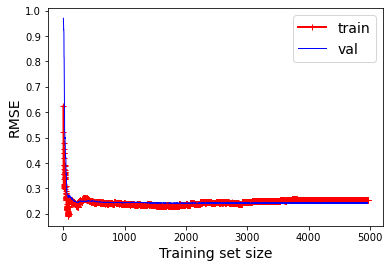

In [36]:
lin_reg = SGDRegressor(max_iter=60,tol=-np.infty,
                       penalty=None, learning_rate="constant",
                       eta0=0.0005, random_state=42)

plot_learning_curves(lin_reg)
plt.show()  

In [33]:
from sklearn.model_selection import KFold

In [46]:
assert False
# get a list of models to evaluate
def get_models():
    models = dict()
    models['Linear reg'] = LinearRegression()
    models['knn'] = KNeighborsRegressor()
    models['SVR'] = SVR()
    models['cart'] = DecisionTreeRegressor()
    models['random forest'] = RandomForestRegressor()
    models['Ridge CHolesky'] = Ridge(alpha=1, solver="cholesky", random_state=42)
    models['Ridge sag'] = Ridge(alpha=1, solver="sag", random_state=42)
    models['Elastic net'] = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
    models['XGboost'] = XGBRegressor()
    
    # models['stacking'] = get_stacking()
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=6,shuffle=True)
#     rf_scores = cross_val_score(model, X, y, cv=cv,n_jobs=-1,scoring=rmsle_score)
#     return np.mean(-rf_scores)

    rf_scores = cross_validate(model, X, y, cv=cv,n_jobs=-1,
                         scoring=('r2','neg_mean_squared_error'),
                         return_train_score=True)
    
    return rf_scores


# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, features_prepared,labels_prepared)
    results.append(scores)
    names.append(name)
    print('>%s %.3f %.3f (%.3f)' % (name, np.mean(scores['train_r2']) ,np.mean(scores['test_r2']), np.std(scores['test_r2'])))
    
# plot model performance for comparison
# plt.boxplot(results, labels=names, showmeans=True)
# plt.show()

>Linear reg 0.937 0.937 (0.008)
>knn 0.944 0.914 (0.007)
>SVR 0.973 0.964 (0.007)
>cart 1.000 0.955 (0.007)
>random forest 0.997 0.976 (0.006)
>Ridge CHolesky 0.937 0.937 (0.006)
>Ridge sag 0.937 0.937 (0.007)
>Elastic net 0.923 0.923 (0.006)
>XGboost 0.999 0.975 (0.005)


>knn 0.850 (0.011)
>SVR 0.945 (0.008)
>cart 0.810 (0.013)
>random forest 0.910 (0.009)
>Ridge CHolesky 0.920 (0.008)
>Ridge sag 0.920 (0.008)
>Elastic net 0.878 (0.007)
>XGboost 0.925 (0.010)

In [49]:
res_train_r2 = [i['train_r2'] for i in results]
res_test_r2 = [i['test_r2'] for i in results]
res_train_rmse = [np.sqrt(np.abs(i['train_neg_mean_squared_error'])) for i in results]
res_test_rmse = [np.sqrt(np.abs(i['test_neg_mean_squared_error'])) for i in results]

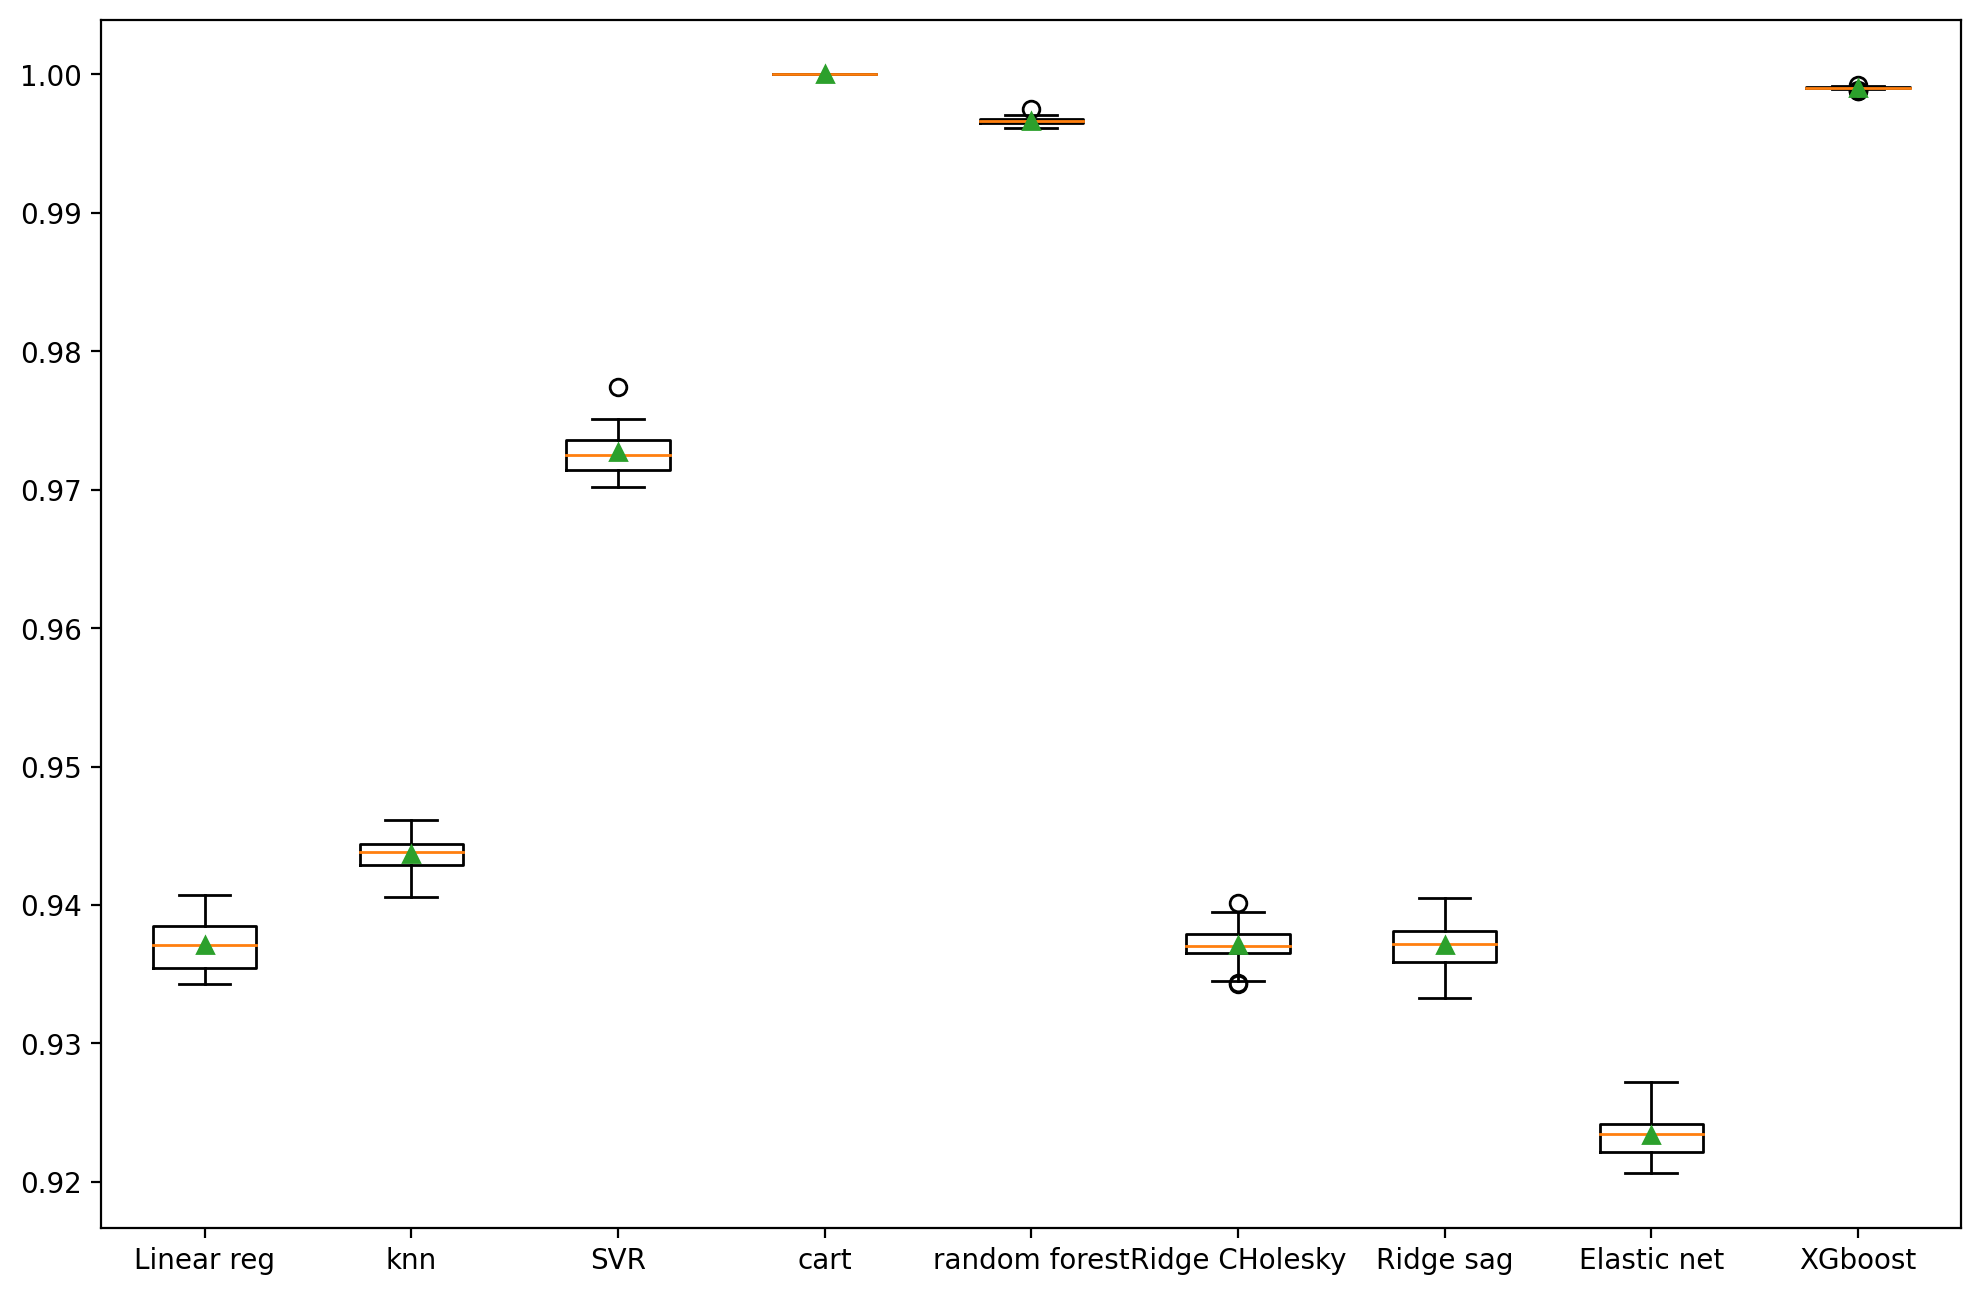

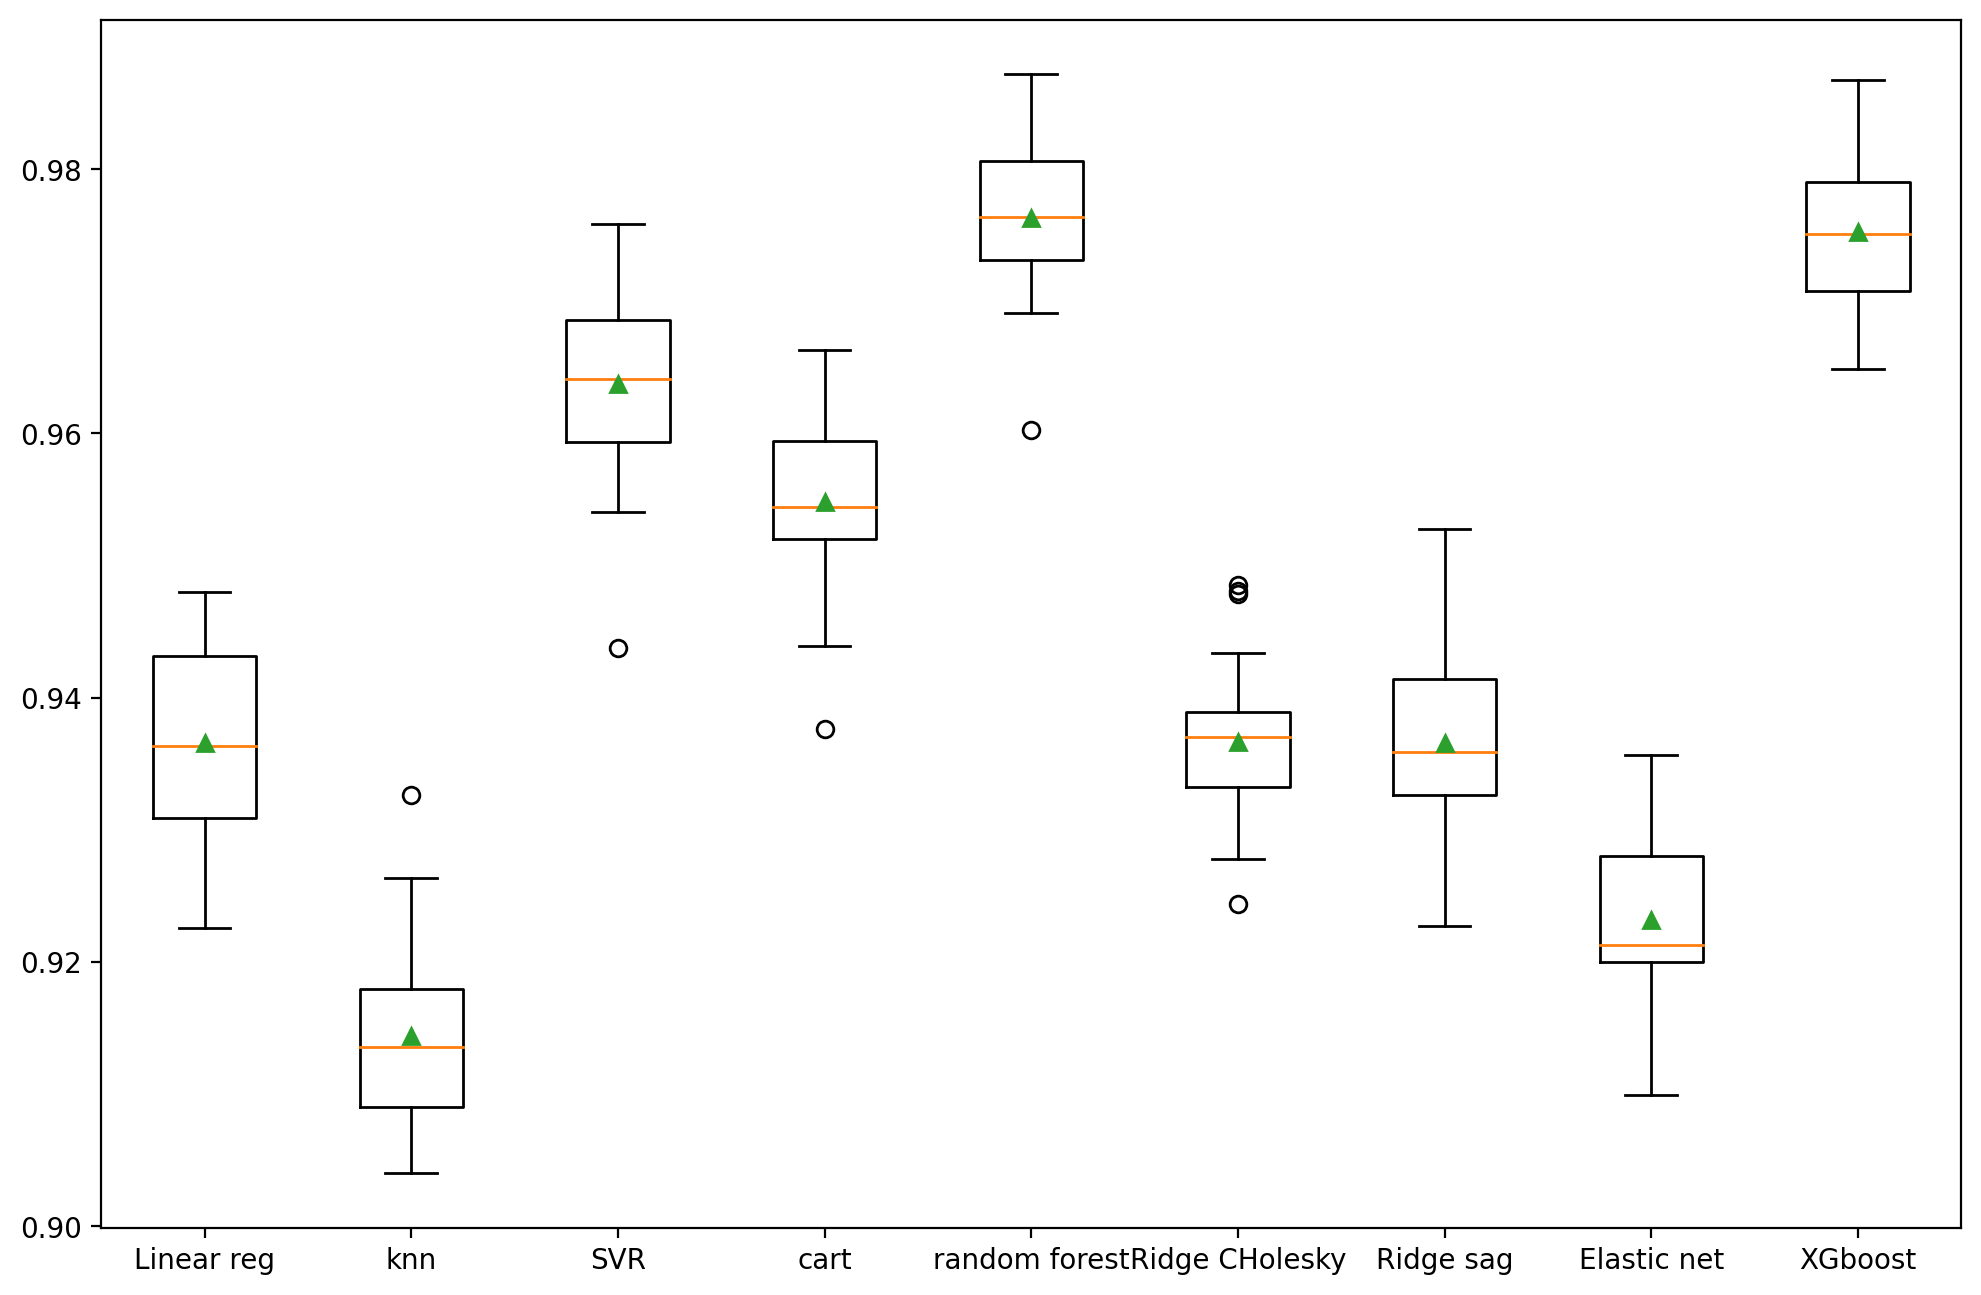

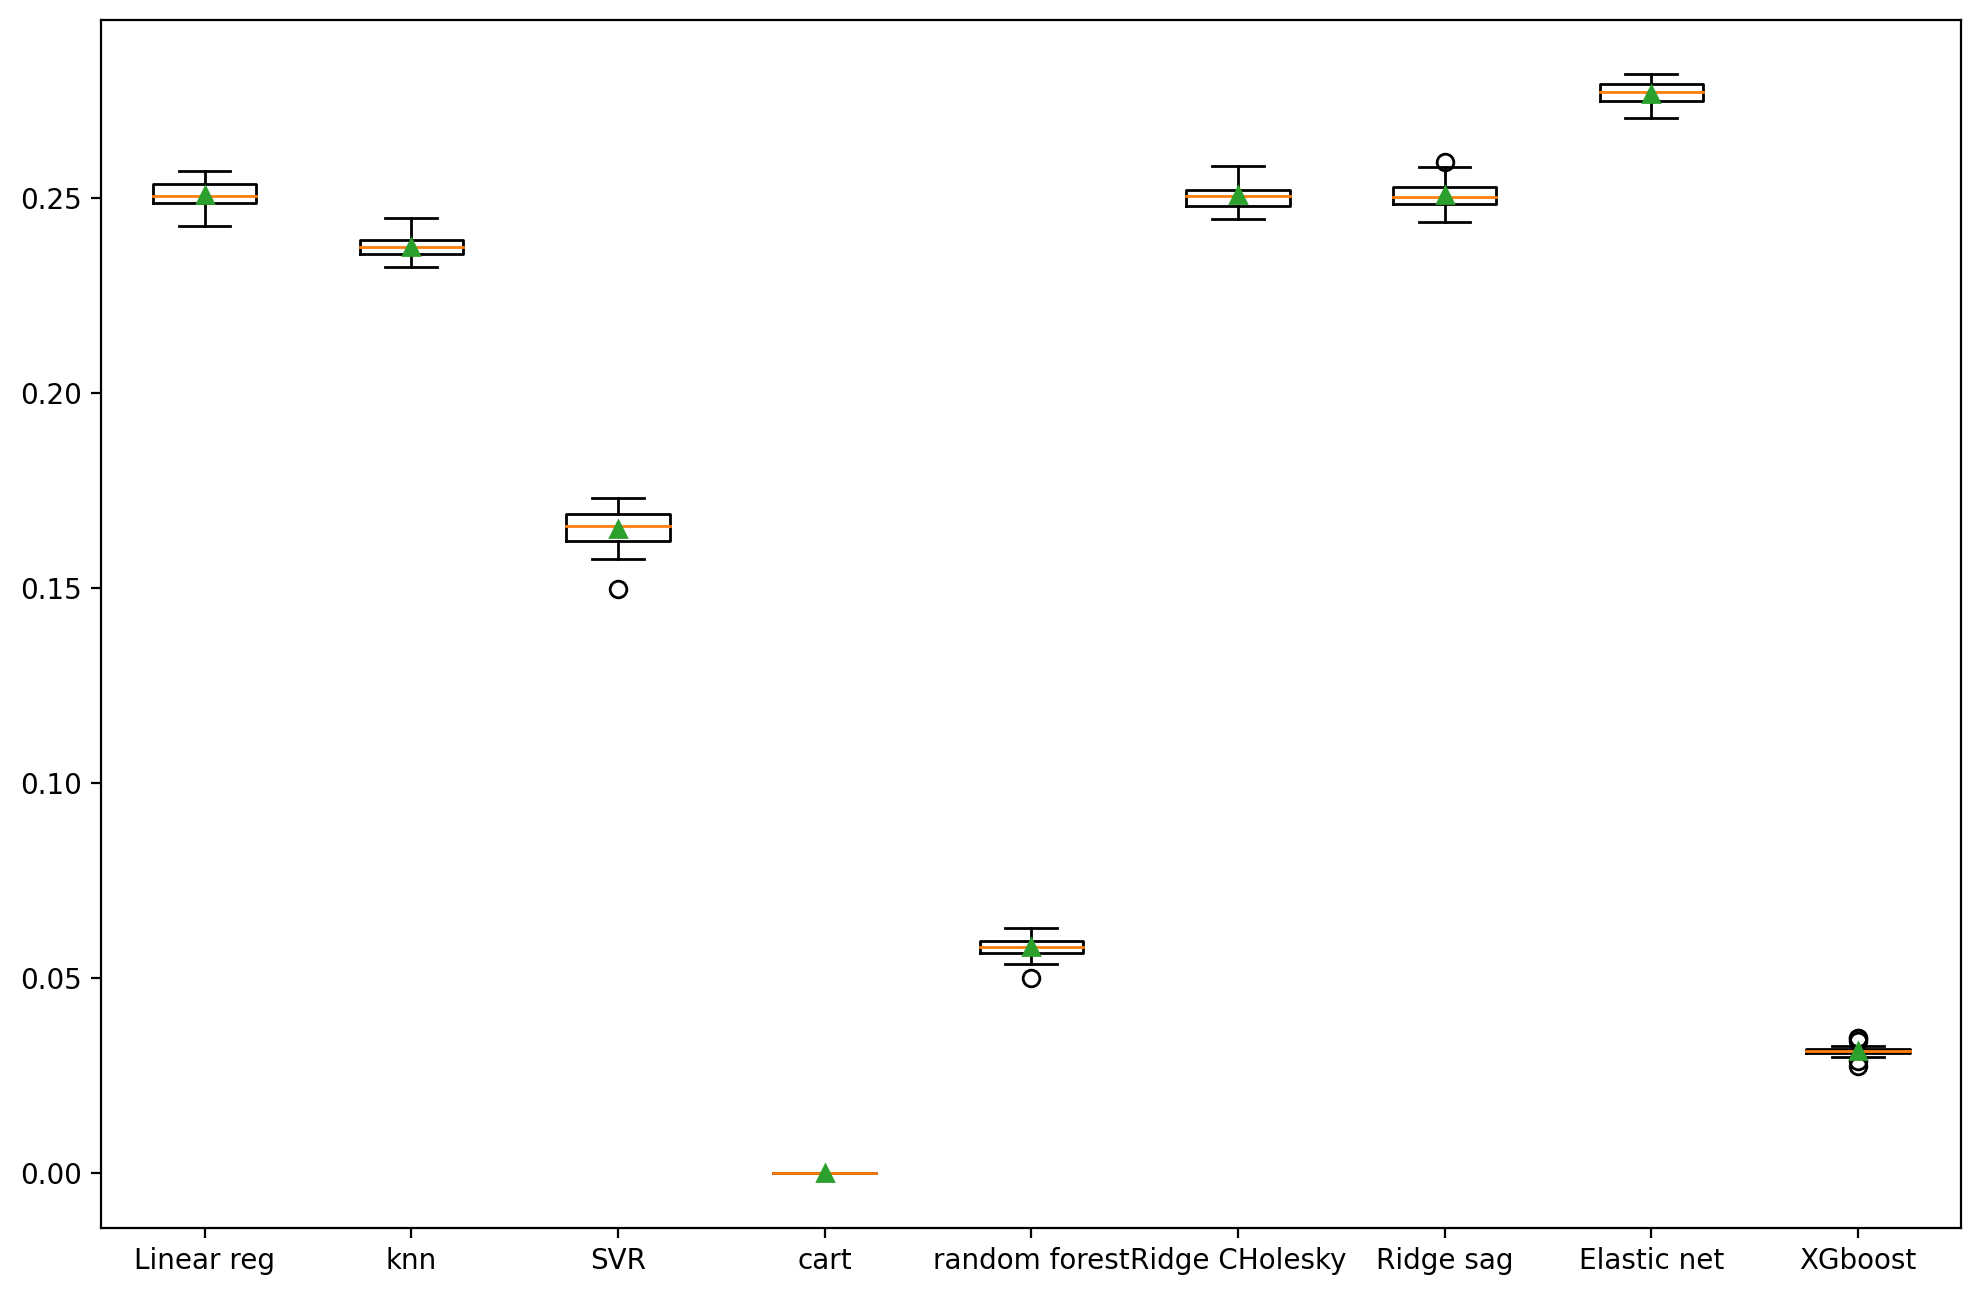

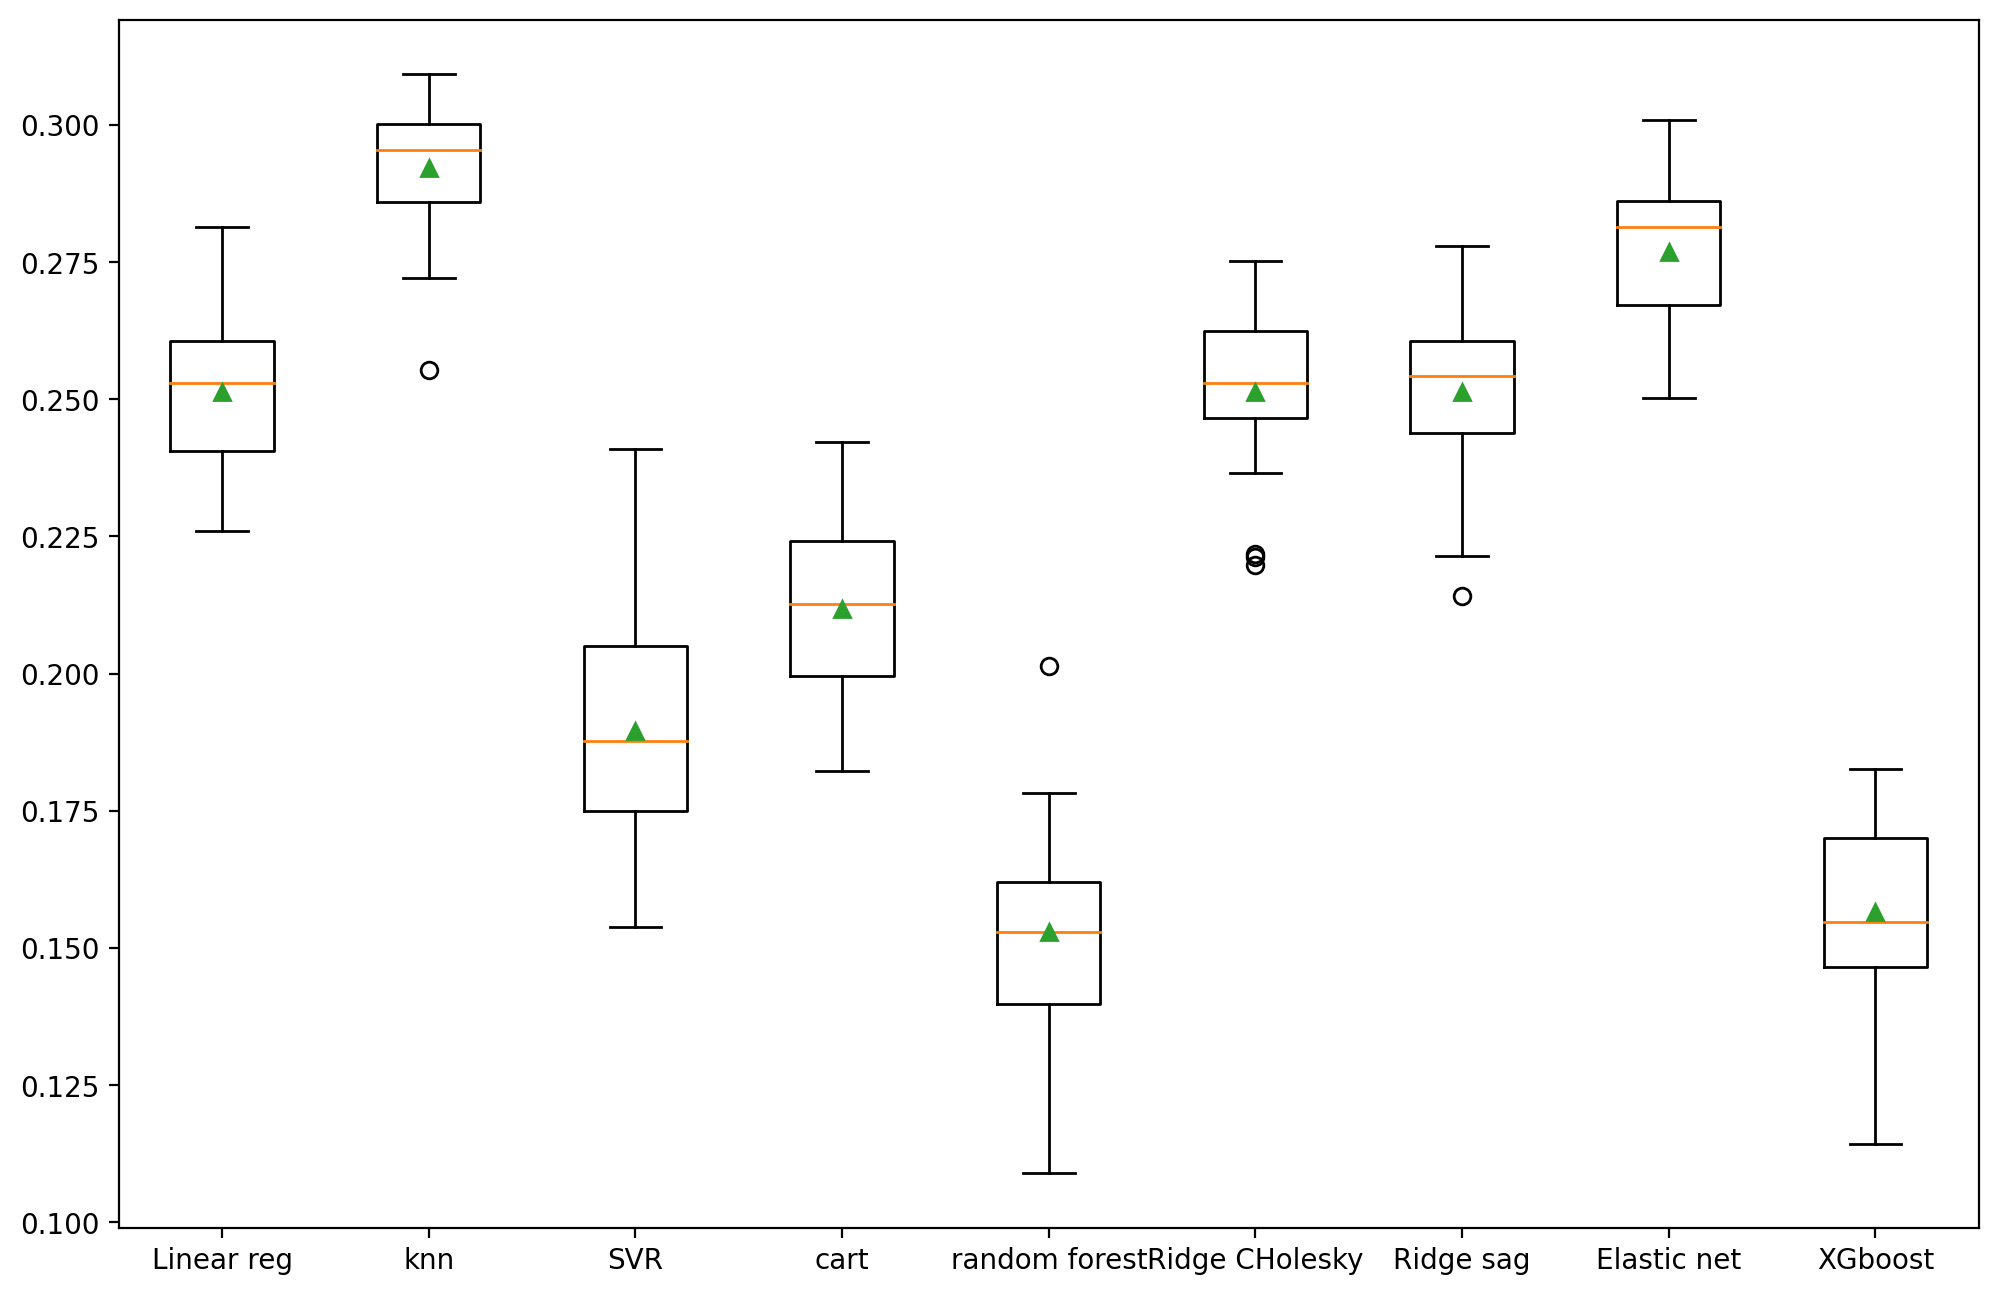

In [56]:
assert False
for met in [res_train_r2,res_test_r2,res_train_rmse,res_test_rmse]:
    plt.figure(figsize=(12,8),dpi=200)
    plt.boxplot(met,labels=names,showmeans=True)
    plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV

In [100]:
param_grid = [
        {'kernel': ['rbf'], 'C': [1.0,3.0,5.0,8.0,12.],
         'gamma': [0.01, 0.03, 0.1, 1.0, 3.0]},
    ]

svr_reg = SVR()
cv = KFold(n_splits=5,shuffle=True)
grid_search_svr = GridSearchCV(svr_reg, param_grid, cv=cv, scoring="r2",n_jobs=4 ,verbose=2)
grid_search_svr.fit(features_prepared, labels_prepared.ravel())

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   18.7s
[Parallel(n_jobs=4)]: Done 125 out of 125 | elapsed:  2.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SVR(), n_jobs=4,
             param_grid=[{'C': [1.0, 3.0, 5.0, 8.0, 12.0],
                          'gamma': [0.01, 0.03, 0.1, 1.0, 3.0],
                          'kernel': ['rbf']}],
             scoring='r2', verbose=2)

In [101]:
grid_search_svr.best_params_,grid_search_svr.best_score_

({'C': 12.0, 'gamma': 0.03, 'kernel': 'rbf'}, 0.9689536508589033)

In [97]:
# Number of trees in random forest
n_estimators = [30,50,80,100]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4]
max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_reg = RandomForestRegressor()
cv = KFold(n_splits=6,shuffle=True)
grid_search_rf = GridSearchCV(rf_reg, param_grid, cv=cv, scoring="r2",n_jobs=-1 ,verbose=2)
grid_search_rf.fit(features_prepared, labels_prepared.ravel())

Fitting 6 folds for each of 192 candidates, totalling 1152 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   25.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1152 out of 1152 | elapsed:  6.7min finished


GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [2, 3, 4, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [30, 50, 80, 100]},
             scoring='r2', verbose=2)

In [94]:
param_grid={
    'alpha':[0.4,0.3,0.2,0.1,0.01],
    'learning_rate':['constant','optimal','invscaling','adaptive'],
    'max_iter':[60,65,70,100,120],
    'penalty':['l2','l1','elasticnet']
}

sgd_reg = SGDRegressor()
cv = KFold(n_splits=6,shuffle=True)
grid_search_sgd = GridSearchCV(sgd_reg, param_grid, cv=cv, scoring="r2",n_jobs=-1 ,verbose=2)
grid_search_sgd.fit(features_prepared, labels_prepared.ravel())

Fitting 6 folds for each of 300 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   23.0s finished


GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.4, 0.3, 0.2, 0.1, 0.01],
                         'learning_rate': ['constant', 'optimal', 'invscaling',
                                           'adaptive'],
                         'max_iter': [60, 65, 70, 100, 120],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='r2', verbose=2)

In [95]:
grid_search_sgd.best_params_,grid_search_sgd.best_score_

({'alpha': 0.01,
  'learning_rate': 'adaptive',
  'max_iter': 65,
  'penalty': 'elasticnet'},
 0.936640406168495)

In [96]:
param_grid = {'learning_rate': [.01,0.2 ,.03], 
              'max_depth': [2,3,4],              
              'subsample': [0.4,0.7,0.9,1.],
              'colsample_bytree': [0.4,0.7,0.9,1.],
              'n_estimators': [30,50,100,200]}

xgb_reg = XGBRegressor()
cv = KFold(n_splits=5,shuffle=True)
grid_search_xgb = GridSearchCV(xgb_reg, param_grid, cv=cv, scoring="r2",n_jobs=-1 ,verbose=2)
grid_search_xgb.fit(features_prepared, labels_prepared.ravel())

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  7.8min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, mon...
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                         

In [ ]:
# WAIT #

In [102]:
from sklearn.ensemble import StackingRegressor
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('SVR', SVR(**grid_search_svr.best_params_)))
    level0.append(("SGD",SGDRegressor(**grid_search_sgd.best_params_)))
    level0.append(("Random_forest",RandomForestRegressor(**grid_search_rf.best_params_)))
    level0.append(("XGboost",XGBRegressor(**grid_search_xgb.best_params_)))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model


model = get_stacking()
model.fit(X_train,y_train_normal.ravel())

StackingRegressor(cv=5,
                  estimators=[('SVR', SVR(C=12.0, gamma=0.03)),
                              ('SGD',
                               SGDRegressor(alpha=0.01,
                                            learning_rate='adaptive',
                                            max_iter=65,
                                            penalty='elasticnet')),
                              ('Random_forest',
                               RandomForestRegressor(min_samples_leaf=4)),
                              ('XGboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, gamma=None,
                                            gpu...
                                            interaction_constraints=None,
                                            l

In [91]:
# SVR_performance = []
# model = XGBRegressor(**grid_search_xgb.best_params_)
# model.fit(X_train,y_train_normal.ravel())

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [103]:
y_pred = model.predict(X_test)
y_pred_inv = label_transformer.inverse_transform(y_pred.reshape(-1,1))
y_test_inv = label_transformer.inverse_transform(y_test_normal.reshape(-1,1))

In [104]:
print("RMSE: ",np.sqrt(mean_squared_error(y_test_inv,y_pred_inv)))
print("r2_score: ",r2_score(y_test_inv,y_pred_inv))
print("max(0,100-rmsle): ",max(0, 100 - rmsle(y_test_inv,y_pred_inv,custom=False))[0])

RMSE:  393.85258866622297
r2_score:  0.9816350468345317
max(0,100-rmsle):  99.99999486052755


In [ ]:
# RMSE:  433.179653869216
# r2_score:  0.9777843759962623
# max(0,100-rmsle):  99.99962364952339

# #Stacking 
# RMSE:  410.94804401856237
# r2_score:  0.9800061581785031
# max(0,100-rmsle):  99.9996708187734


In [105]:
model.fit(features_prepared,labels_prepared.ravel())

StackingRegressor(cv=5,
                  estimators=[('SVR', SVR(C=12.0, gamma=0.03)),
                              ('SGD',
                               SGDRegressor(alpha=0.01,
                                            learning_rate='adaptive',
                                            max_iter=65,
                                            penalty='elasticnet')),
                              ('Random_forest',
                               RandomForestRegressor(min_samples_leaf=4)),
                              ('XGboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=1.0, gamma=None,
                                            gpu...
                                            interaction_constraints=None,
                                            l

In [106]:
##################################################################

In [107]:
test = pd.read_csv("./dataset/test.csv",parse_dates=['instock_date'])
test.head()

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955
2,NKCE6GJ5XVJDXNNZ,1.0,2015-11-14 18:12:39,183,Analiese,No,Technology,2,55,0,493.0,9.0,7175.0,15715
3,NKCEB8BK3ZXDHDHM,8.0,2015-11-21 04:56:19,358,Rusty,Yes,Child_care,3,86,0,303.0,16.0,5404.0,13078
4,TOPEFDXSAHRNPF94,33.0,2015-05-06 15:09:46,167,Eloise,No,Technology,0,27,0,567.0,16.0,4069.0,6244


In [108]:
Product_id = test['Product_id'].copy()

In [109]:
test_prepared = preprocessing_pipeline.transform(test)

In [110]:
test_pred_normal = model.predict(test_prepared)

In [111]:
test_pred_inv = label_transformer.inverse_transform(test_pred_normal.reshape(-1,1))

In [112]:
final_df = pd.DataFrame(np.c_[Product_id.values,test_pred_inv],columns=['Product_id','Selling_Price'])

In [113]:
final_df.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3274.01
1,ACCEGCATKHNRXUHW,1891.97
2,NKCE6GJ5XVJDXNNZ,12434.2
3,NKCEB8BK3ZXDHDHM,9509.47
4,TOPEFDXSAHRNPF94,5606.41


In [114]:
final_df.to_csv("Stacking_tuned_Submission_one.csv",index=False)

In [115]:
pd.read_csv("Submission_one.csv").head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3223.095703
1,ACCEGCATKHNRXUHW,1822.017700
2,NKCE6GJ5XVJDXNNZ,12550.082031
3,NKCEB8BK3ZXDHDHM,10016.928711
4,TOPEFDXSAHRNPF94,5845.941406
